# Decision Support System for Health Insurance

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

## Import Data

In [2]:
df = pd.read_csv(r'/content/insurance1.csv')
df.head()

,age,sex,weight,bmi,hereditary_diseases,children,smoker,city,bloodpressure,diabetes,regular_ex,job_title,charges
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7


## Understand Data

In [3]:
df.shape

(15000, 13)

In [4]:
df.dtypes

age                    float64
sex                     object
weight                   int64
bmi                    float64
hereditary_diseases     object
children                 int64
smoker                   int64
city                    object
bloodpressure            int64
diabetes                 int64
regular_ex               int64
job_title               object
charges                float64
dtype: object

### Removing duplicates from data

In [5]:
# check the duplicate values in the dataframe
df.duplicated().sum()

1096

In [6]:
# Remove the duplicates from the dataset
df.drop_duplicates(inplace=True)

In [7]:
# check the shape of the dataset
df.shape

(13904, 13)

## Exploratory Data Analysis

### Statistical Distribution

In [8]:
df.describe()

,age,weight,bmi,children,smoker,bloodpressure,diabetes,regular_ex,charges
count,13543.000000,13904.000000,13003.000000,13904.000000,13904.000000,13904.000000,13904.000000,13904.000000,13904.000000
mean,39.556598,64.894347,30.273483,1.126438,0.200662,68.657652,0.771145,0.230725,13431.813744
std,14.011047,13.675070,6.125247,1.225661,0.400510,19.430514,0.420111,0.421312,12142.099413
min,18.000000,34.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1121.900000
25%,27.000000,54.000000,25.700000,0.000000,0.000000,64.000000,1.000000,0.000000,4883.900000
50%,40.000000,63.000000,29.400000,1.000000,0.000000,71.000000,1.000000,0.000000,9567.000000
75%,52.000000,76.000000,34.400000,2.000000,0.000000,80.000000,1.000000,0.000000,16657.700000
max,64.000000,95.000000,53.100000,5.000000,1.000000,122.000000,1.000000,1.000000,63770.400000


The distinct value shows number of distinct values in a attribute Skewness provide the Mode of the attribute by comparing with Mean we can conclude if its right or left skewed and explains if the distribution is peak or flat related to normal sdistribution

In [9]:
obs = df.shape[0]
distincts = df.apply(lambda x: x.unique().shape[0]) #provides number of distinct values in the attribute
skewness = df.skew()
kurtosis = df.kurt()
Mean = df.mean()
#data_description = pd.concat([types,counts,uniques,nulls,distincts, missing_ration,skewness, kurtosis] , axis=1)
cols = ['distincts', 'skewness', 'kurtosis', 'Mean']
str = pd.concat([ distincts, skewness, kurtosis, Mean] , axis=1)

str.columns = cols
#dtypes = str.types.value_counts()
display(str.sort_values(by='skewness', ascending=False))

<ipython-input-9-5a20668bf494>:3: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = df.skew()
<ipython-input-9-5a20668bf494>:4: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  kurtosis = df.kurt()
<ipython-input-9-5a20668bf494>:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Mean = df.mean()


,distincts,skewness,kurtosis,Mean
smoker,2,1.495002,0.235063,0.200662
charges,2054,1.489221,1.447701,13431.813744
regular_ex,2,1.278453,-0.365610,0.230725
children,6,0.931568,0.204577,1.126438
bmi,270,0.377468,-0.076433,30.273483
weight,58,0.286729,-0.862059,64.894347
age,48,0.006109,-1.248190,39.556598
diabetes,2,-1.291012,-0.333336,0.771145
bloodpressure,69,-1.969798,5.432258,68.657652
sex,2,NaN,NaN,NaN


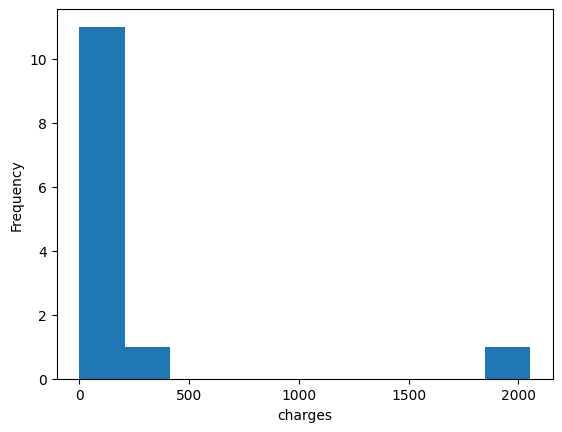

In [10]:
str['distincts'].plot(kind="hist")
plt.xlabel('charges')
plt.show()

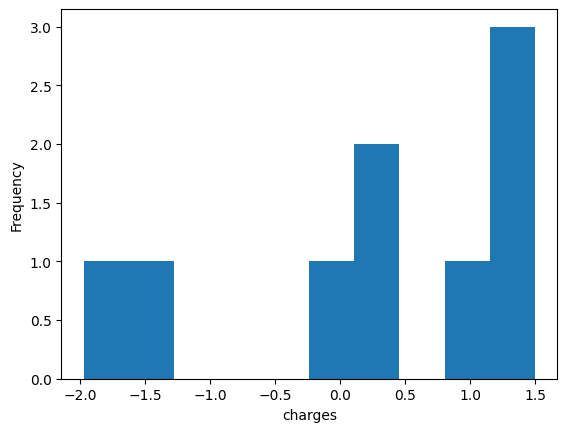

In [11]:
str['skewness'].plot(kind="hist")
plt.xlabel('charges')
plt.show()

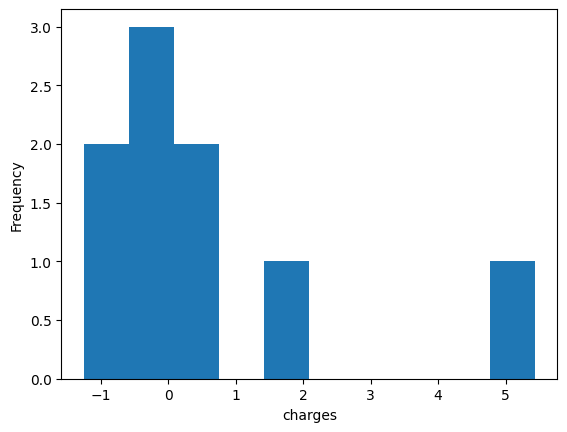

In [12]:
str['kurtosis'].plot(kind="hist")
plt.xlabel('charges')
plt.show()

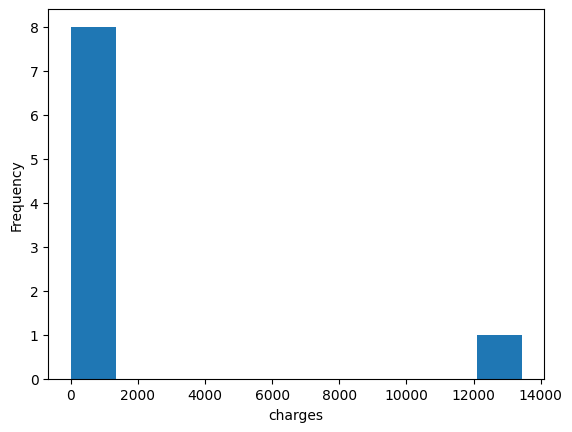

In [13]:
str['Mean'].plot(kind="hist")
plt.xlabel('charges')
plt.show()

### Categorical Data Analysis

In [14]:
Cat_df =df.select_dtypes(include='object')
print("The data set has following rows and columns",Cat_df.shape) # Displays number of rows and columns of category data set
print("The Categorical arrrtibutes are", Cat_df.columns) # Displays data set attributes

The data set has following rows and columns (13904, 4)
The Categorical arrrtibutes are Index(['sex', 'hereditary_diseases', 'city', 'job_title'], dtype='object')


#### Null Value analysis

In [15]:
catnullcheck = Cat_df.isnull().sum() #Provides number of null value in particular attribute
print(catnullcheck[catnullcheck > 0])

Series([], dtype: int64)


#### Data Quality Check - Null Percentage Check

In [16]:
Cat_null_mean_check = Cat_df.isnull().mean()
for feature, value in Cat_null_mean_check.items():
    if(value >0):
         print("The feature",feature, " has following percentage of Null Values",round((value*100),2))


### Numerical Data Analysis

In [17]:
num_df =df.select_dtypes(exclude='object')
print(num_df.columns) #Displays Numerical data attributes
print(num_df.shape)#Displays shape of Numerical data set

Index(['age', 'weight', 'bmi', 'children', 'smoker', 'bloodpressure',
       'diabetes', 'regular_ex', 'charges'],
      dtype='object')
(13904, 9)


#### Null Value Analysis

In [18]:
numnullcheck = num_df.isnull().sum()
print(numnullcheck[numnullcheck > 0])

age    361
bmi    901
dtype: int64


#### Data Quality Check - Null Percentage Check of Numerical Data

In [19]:
Num_null_mean_check = num_df.isnull().mean()
for feature, value in Num_null_mean_check.items():
    if(value >0):
         print("The feature",feature, " has following percentage of Null Values",round((value*100),2))


The feature age  has following percentage of Null Values 2.6
The feature bmi  has following percentage of Null Values 6.48


### Distribution of charges

<ipython-input-20-deef4314f6c1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['charges'], kde = True, color = 'c')


Text(0.5, 1.0, 'Distribution of Charges')

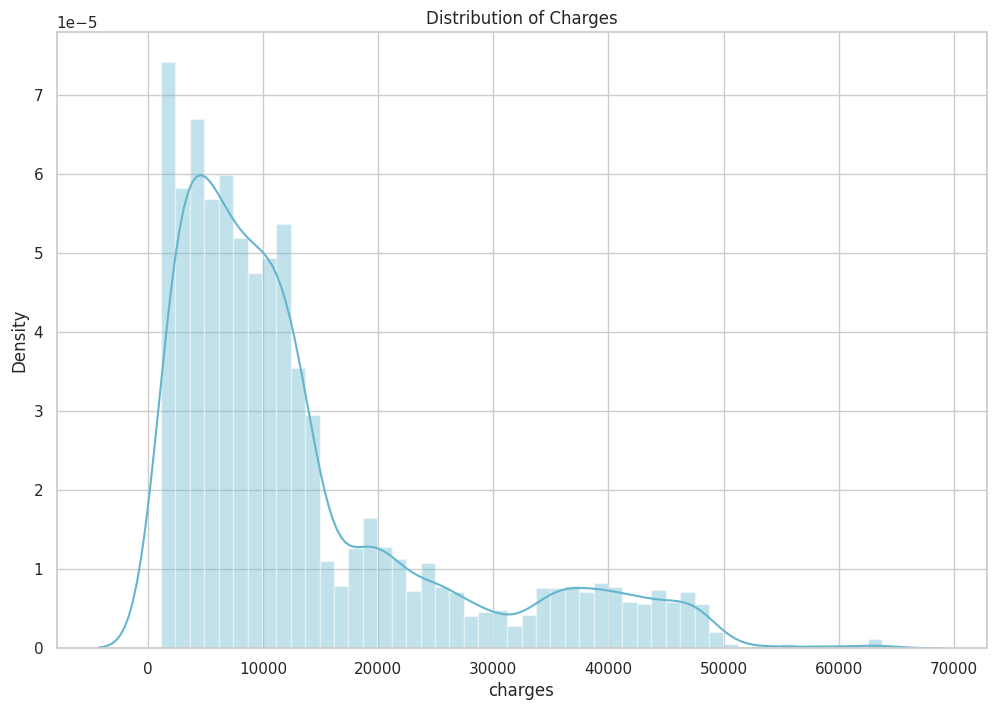

In [20]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')

<ipython-input-21-d7e2ea77071f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'r' )


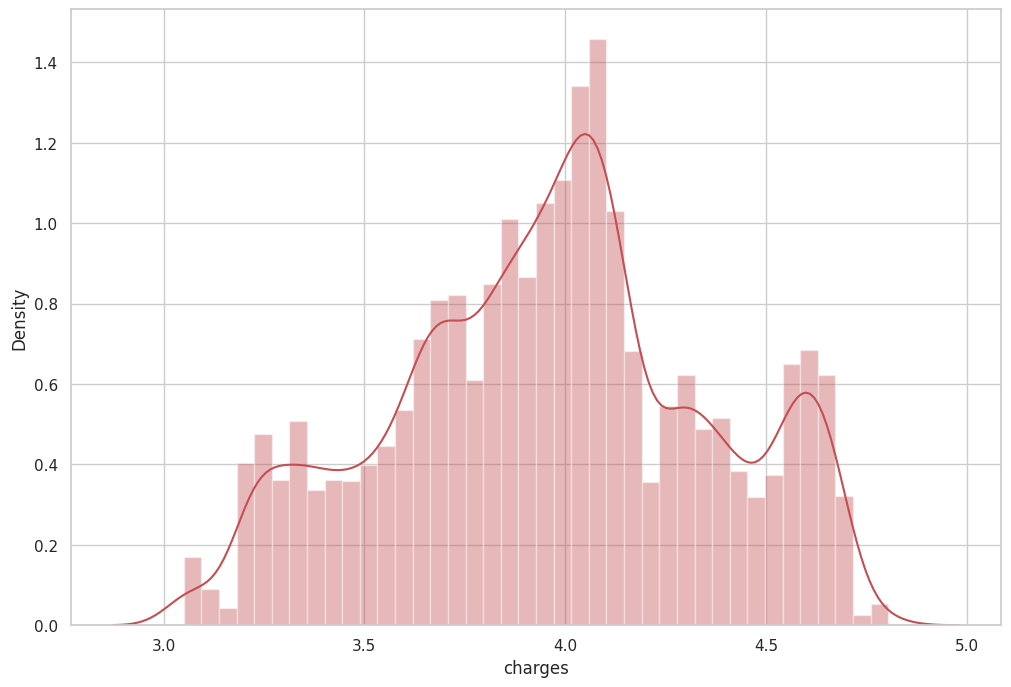

In [21]:
#applying natural log
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'r' )

<ipython-input-22-d64397edb458>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'], hist=False)


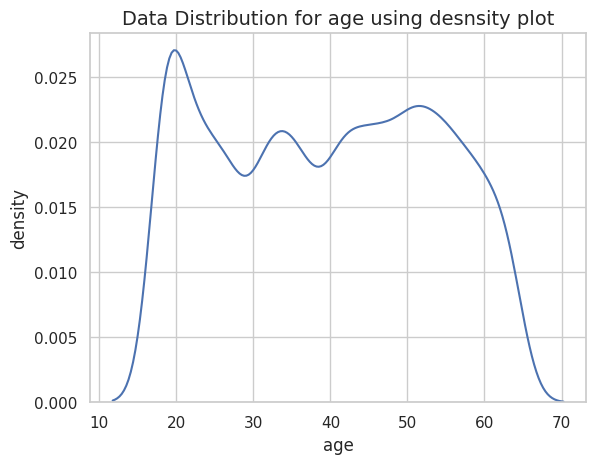

In [22]:
#  Density plot for age
sns.distplot(df['age'], hist=False)
plt.title("Data Distribution for age using desnsity plot", fontsize=14)
plt.xlabel("age")
plt.ylabel("density")
plt.show()

<ipython-input-23-0c8de2abeebd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["bmi"], hist=False)


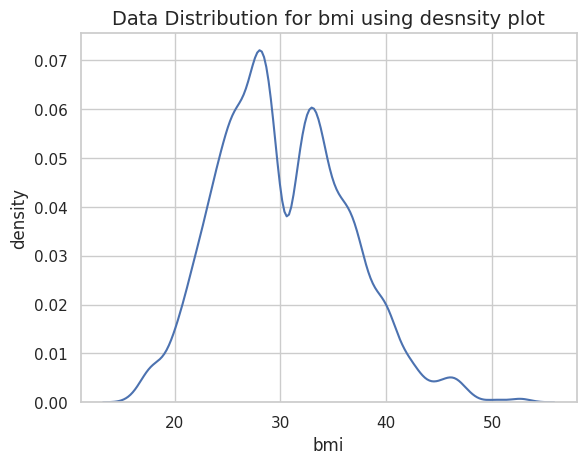

In [23]:
#  Density plot for bmi
sns.distplot(df["bmi"], hist=False)
plt.title("Data Distribution for bmi using desnsity plot", fontsize=14)
plt.xlabel("bmi")
plt.ylabel("density")
plt.show()

<ipython-input-24-a75b117dc9b6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[(df.bmi >= 30)]['charges'], color = 'm')


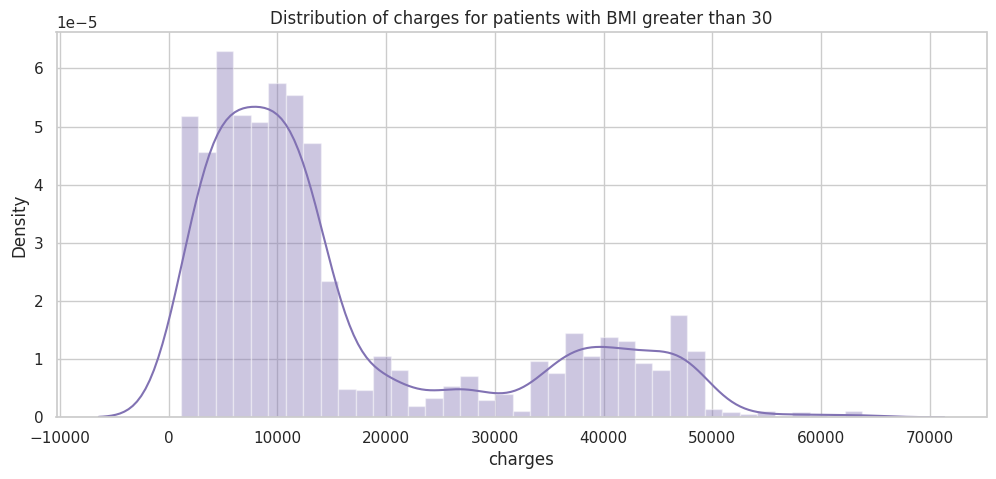

In [24]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(df[(df.bmi >= 30)]['charges'], color = 'm')

<ipython-input-25-f7fd4a420a90>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[(df.bmi < 30)]['charges'], color = 'b')


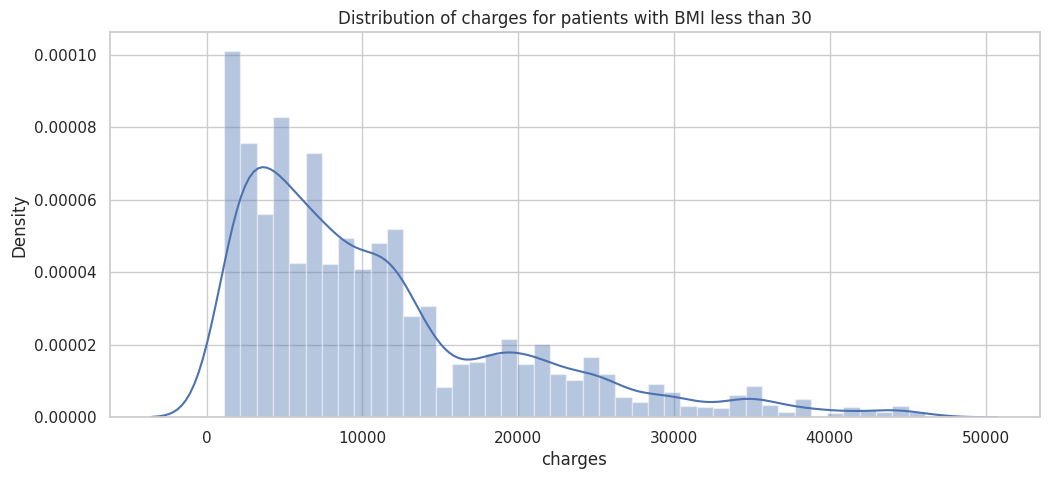

In [25]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(df[(df.bmi < 30)]['charges'], color = 'b')

#### People with BMI above 30 spend more on treatment!

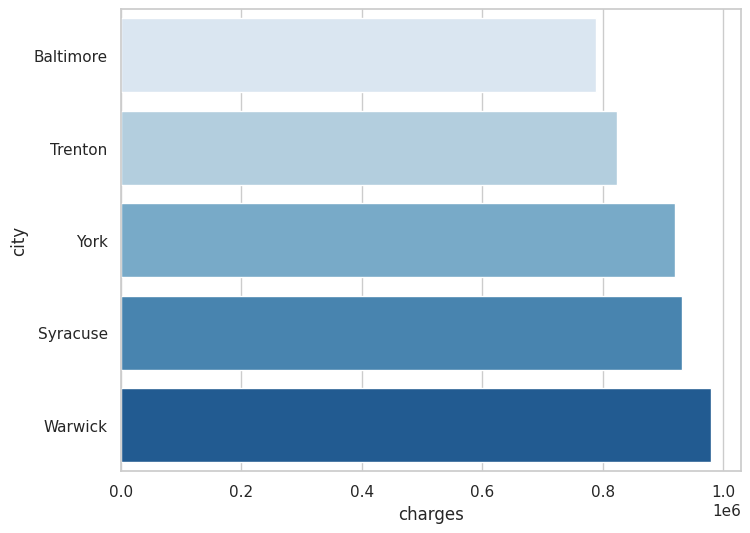

In [26]:
#Charges by city
charges = df['charges'].groupby(df.city).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(x=charges.head(), y=charges.head().index, palette='Blues')

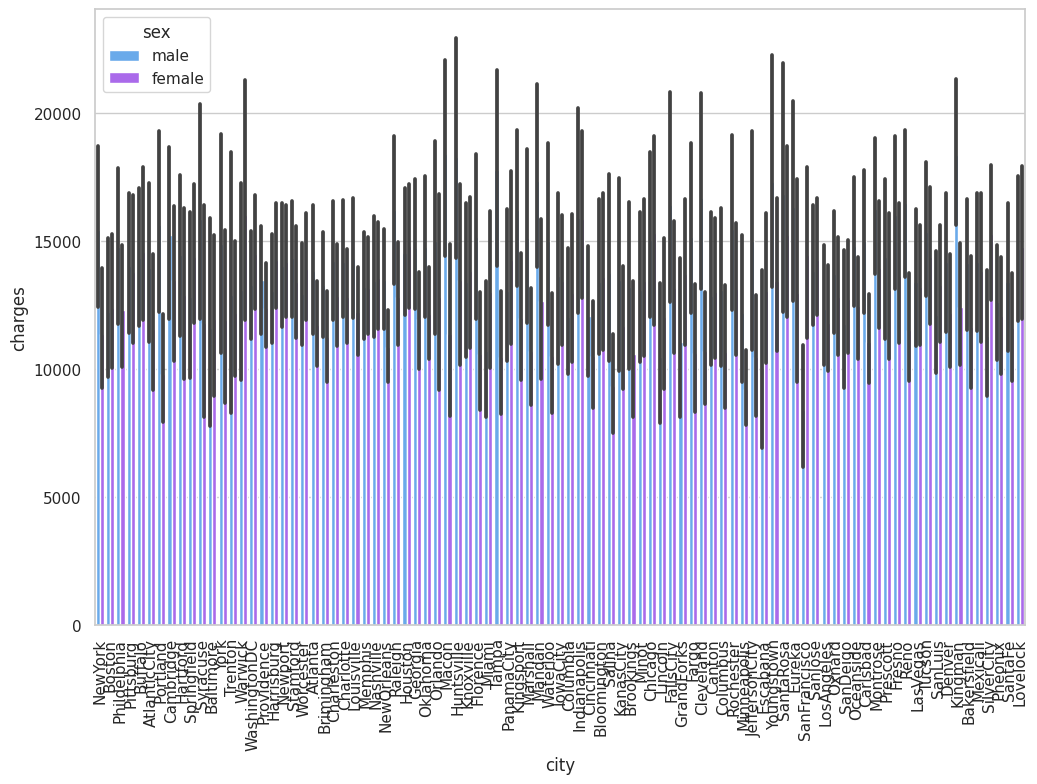

In [27]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='city', y='charges', hue='sex', data=df, palette='cool')
for item in ax.get_xticklabels():
    item.set_rotation(90)

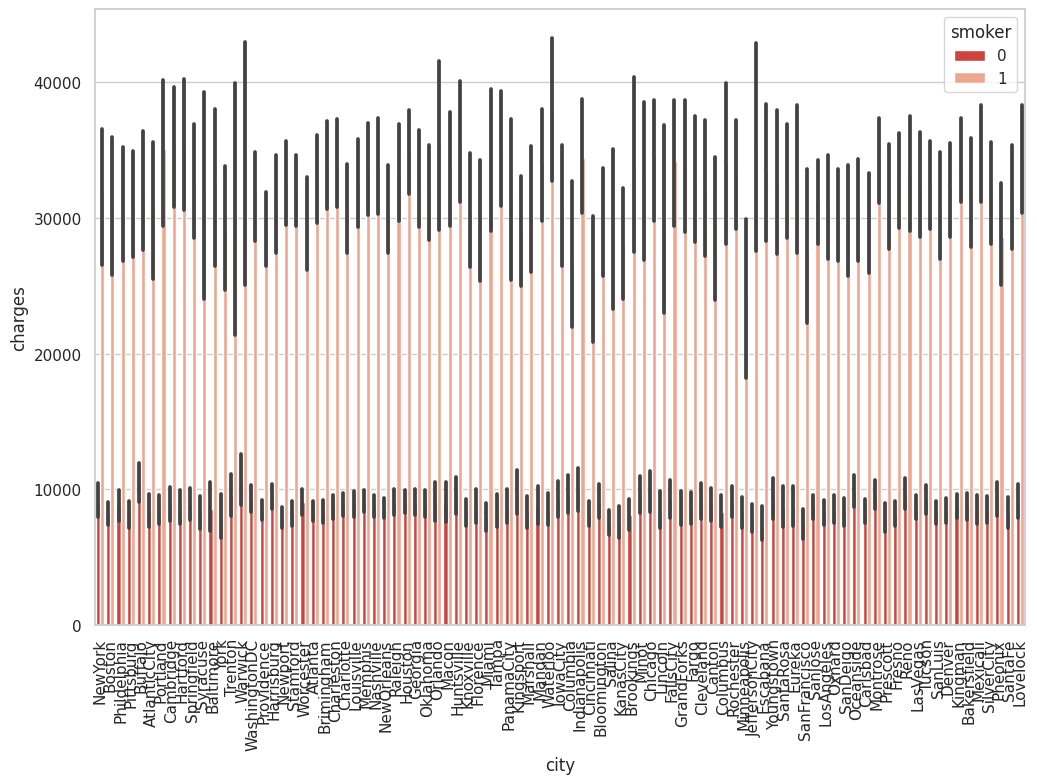

In [28]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'city', y = 'charges',
                 hue='smoker', data=df, palette='Reds_r')
for item in ax.get_xticklabels():
    item.set_rotation(90)

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='city', y='charges', hue='children', data=df, palette='Set1')
for item in ax.get_xticklabels():
    item.set_rotation(90)

In [ ]:
# Analyzing the medical charges by age, bmi and children according to the smoking factor
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='Set3')

In [ ]:
#Smoking has the highest impact on medical costs, even though the costs are growing with age, bmi and children.
#Also people who have children generally smoke less, which the following violinplots shows too

f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.violinplot(x = 'children', y = 'charges', data=df,
                 orient='v', hue='smoker', palette='inferno')

### Detect the outliers in our dataset

In [ ]:
df

In [ ]:
# Find the 99th percentile of charge column
charge_value=np.quantile(df["charges"], 0.99)
charge_value

In [ ]:
# Selecting all the rows from the dataset whose charge value is greater than 48226.846999999965 in order to detect the outliers
df[df["charges"]>48226.846999999965]

### Remove outliers in the dataset

In [ ]:
df_filtered = df[df["charges"]<48226.846999999965]
df = df_filtered
df

### Converting objects labels into categorical

In [ ]:
df[['sex', 'smoker', 'city', 'hereditary_diseases', 'job_title']] = df[['sex', 'smoker', 'city', 'hereditary_diseases', 'job_title']].astype('category')
df.dtypes

### Converting category labels into numerical using LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.city.drop_duplicates())
df.city = label.transform(df.city)
label.fit(df.hereditary_diseases.drop_duplicates())
df.hereditary_diseases = label.transform(df.hereditary_diseases)
label.fit(df.job_title.drop_duplicates())
df.job_title = label.transform(df.job_title)
df.dtypes

## Find the correlation between variables

In [ ]:
correlation=df.corr()
correlation

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.heatmap(df.corr(), annot=True, cmap='cool')

### Handle null values in the data

In [ ]:
from sklearn.model_selection import train_test_split as holdout
from sklearn import metrics
x = df.drop(['charges'], axis = 1)
y = df['charges']
x = x.fillna(x.mean())
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor as rfr

Rfr = rfr(
    n_estimators=100,
    criterion='squared_error',  # Use 'squared_error' instead of 'mse'
    random_state=1,
    n_jobs=-1
)

Rfr.fit(x_train, y_train)
x_train_pred = Rfr.predict(x_train)
x_test_pred = Rfr.predict(x_test)


## Feature importance ranking

In [ ]:
print('Feature importance ranking\n\n')
importances = Rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in Rfr.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
variables = ['age', 'sex', 'weight', 'bmi', 'hereditary_diseases', 'children','smoker', 'city', 'bloodpressure', 'diabetes', 'regular_ex', 'job_title']
importance_list = []
for f in range(x.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))


In [ ]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.xticks(rotation=90)
plt.bar(importance_list, importances[indices],
       color="r", yerr=std[indices], align="center")


## Model Building

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
# from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
from sklearn.model_selection import train_test_split as holdout
from sklearn import metrics
x = df.drop(['charges'], axis = 1)
y = df['charges']
x = x.fillna(x.mean())
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)

In [ ]:
# Training models using k-fold cross-validation and seeing the performance of all the models in the given dataset.
# The below functions are used to train models of the data created and it returns the score for the model based on the predictions compared with the actual predictions.

n_folds = 10
def mae_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(x_train)
    mae= cross_val_score(model, x_train, y_train, scoring="neg_mean_absolute_error", cv=kf)
    return(mae)

def mae(y_train, y_pred):
    return (mean_absolute_error(y_train, y_pred))


def mse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(x_train)
    mse= (-cross_val_score(model, x_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(mse)

def mse(y_train, y_pred):
    return (mean_squared_error(y_train, y_pred))


def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(x_train)
    rmse= np.sqrt(-cross_val_score(model, x_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

def rmse(y_train, y_pred):
    return np.sqrt(mean_squared_error(y_train, y_pred))

# Baseline - Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
linearReg = LinearRegression()

In [ ]:
scores ={}
scores1 ={}
scores2 ={}

In [ ]:
score = mae_cv(linearReg)
print("Linear:: Mean Absolute Error")
print("----------------------------")
print("Cross Validation: ",score.mean(), " Std:", score.std())
scores['linearReg'] = (score.mean(), score.std())
linear_model = linearReg.fit(x_train, y_train)
y_pred_linear = linear_model.predict(x_train)
print("MAE: ", mae(y_train,y_pred_linear))
print("")

score1 = mse_cv(linearReg)
print("Linear:: Mean Squared Error")
print("----------------------------")
print("Cross Validation: ",score1.mean(), " Std:", score1.std())
scores1['linearReg'] = (score1.mean(), score1.std())
print("MSE: ", mse(y_train,y_pred_linear))
print("")

score2 = rmse_cv(linearReg)
print("Linear:: Root Mean Squared Error")
print("----------------------------")
print("Cross Validation: ",score2.mean(), " Std:", score2.std())
scores2['linearReg'] = (score2.mean(), score2.std())
print("RMSE: ", rmse(y_train,y_pred_linear))